In [75]:
!shodan init <YOUR_KEY>

Successfully initialized


In [67]:
!shodan download --limit -1 shodan_output "mikrotik"

Search query:			mikrotik
Total number of results:	1644005
Query credits left:		0
Output file:			shodan_output_cable.json.gz
  [####################################]  100%              
Notice: fewer results were saved than requested
Saved 100 results into file shodan_output_cable.json.gz


In [78]:
import json
import pandas as pd
import matplotlib as mpl
import re
import gzip

## Reading the json file

In [79]:
# df = pd.read_json('shodan_output.json',lines=True) #THIS DOESN'T WORK!!!!
data = [json.loads(line) for line in gzip.open('shodan_output.json.gz', 'r')]

In [80]:
df = pd.DataFrame(data)

### Testing whether the word mikrotik appears in the banner ('data' field)

In [81]:
len(df['data'].str.contains('MikroTik',flags=re.IGNORECASE))

10000

### Extracting some information from other fields

In [82]:
df['country_code'] = df['location'].apply(lambda x: x['country_code'])
df['country_name'] = df['location'].apply(lambda x: x['country_name'])

### Ploting shit

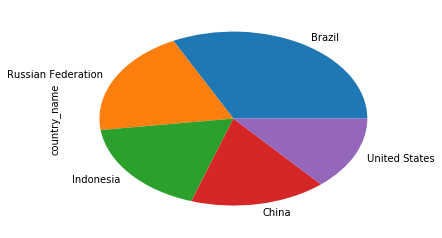

In [84]:
df['country_name'].value_counts().head().plot(kind="pie")